# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from causalml.inference.meta import LRSRegressor, XGBTRegressor,BaseRRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from causalml.inference.meta import BaseXLearner, BaseSLearner, BaseTLearner, BaseRLearner
from causalml.inference.meta.explainer import Explainer
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from causalml.inference.tree import UpliftRandomForestClassifier


# Import Data

In [2]:
df = pd.read_csv('/Users/qianlou/Documents/GitHub/Customer-Personality-Analysis-2.0/Data/Preprocessed Data/Final Preprocessed Data.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head(5)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Enroll_Year,Enroll_Month,Enroll_Day,Member_Year,Age,Total_amount,Total_purchase,Total_Children,Is_Parent,Family_Size,Cmp_Attitude,R,F,M,RFM_Group_About To Sleep,RFM_Group_At Risk,RFM_Group_Hibernating,RFM_Group_Loyalist,RFM_Group_Need Attention,RFM_Group_New Customers,RFM_Group_Potential Loyalist,RFM_Group_Promising,Age_Demographic_Baby Boomer,Age_Demographic_Gen X,Age_Demographic_Gen Y,Income_Category_High,Income_Category_Low,Income_Category_Medium,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,2012,9,4,4,59,1617,22,0,0,1,0,0,1,1,False,False,False,False,False,False,True,False,True,False,False,True,False,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2174,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2014,3,8,2,62,27,4,2,1,3,0,1,0,0,True,False,False,False,False,False,False,False,True,False,False,True,False,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4141,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,2013,8,21,3,51,776,20,0,0,2,0,1,1,1,False,False,False,True,False,False,False,False,False,True,False,True,False,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6182,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,2014,2,10,2,32,53,6,1,1,3,0,1,0,0,True,False,False,False,False,False,False,False,False,False,True,True,False,False,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5324,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,2014,1,19,2,35,422,14,1,1,3,0,0,1,1,False,False,False,False,False,False,True,False,False,False,True,True,False,False,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [4]:
bool_cols = [col for col in df if df[col].dtype == np.bool]
print(bool_cols)

# Change them to int
for col in bool_cols:
    df[col] = df[col].astype(int)

['RFM_Group_About To Sleep', 'RFM_Group_At Risk', 'RFM_Group_Hibernating', 'RFM_Group_Loyalist', 'RFM_Group_Need Attention', 'RFM_Group_New Customers', 'RFM_Group_Potential Loyalist', 'RFM_Group_Promising', 'Age_Demographic_Baby Boomer', 'Age_Demographic_Gen X', 'Age_Demographic_Gen Y', 'Income_Category_High', 'Income_Category_Low', 'Income_Category_Medium']


`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


# Causal 1: Recency Impact

[22:29:56] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[22:29:57] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
Pass `sample_weight` as keyword args.


Model: XGBRegressor, Treatment: Income_Category_High
MSE: 54.66826952248225
ATE: 0.9843331575393677 (±0.007619262207299471)


[22:29:57] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
Pass `sample_weight` as keyword args.


Model: XGBRegressor, Treatment: Is_Parent
MSE: 54.86525593815622
ATE: 0.7149690985679626 (±0.014558782801032066)


[22:29:58] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
Pass `sample_weight` as keyword args.


Model: XGBRegressor, Treatment: Cmp_Attitude
MSE: 55.3426984163206
ATE: 0.217045858502388 (±0.00942070409655571)


[22:29:59] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
Pass `sample_weight` as keyword args.


Model: XGBRegressor, Treatment: Complain
MSE: 55.49382905129922
ATE: 0.012354875914752483 (±0.0023772157728672028)
Model: XGBTRegressor, Treatment: Income_Category_High
MSE: 66.16413309474056
ATE: 3.901690938955153 (±14.35782499978516)
Model: XGBTRegressor, Treatment: Is_Parent
MSE: 59.544064737827355
ATE: -0.7211422902470211 (±1.3109479711600207)
Model: XGBTRegressor, Treatment: Cmp_Attitude
MSE: 70.49576135031673
ATE: -0.6566183175999605 (±1.3493830528361355)
Model: XGBTRegressor, Treatment: Complain
MSE: 69.55118729385957
ATE: 1.0159761496425719 (±2.768747326060291)


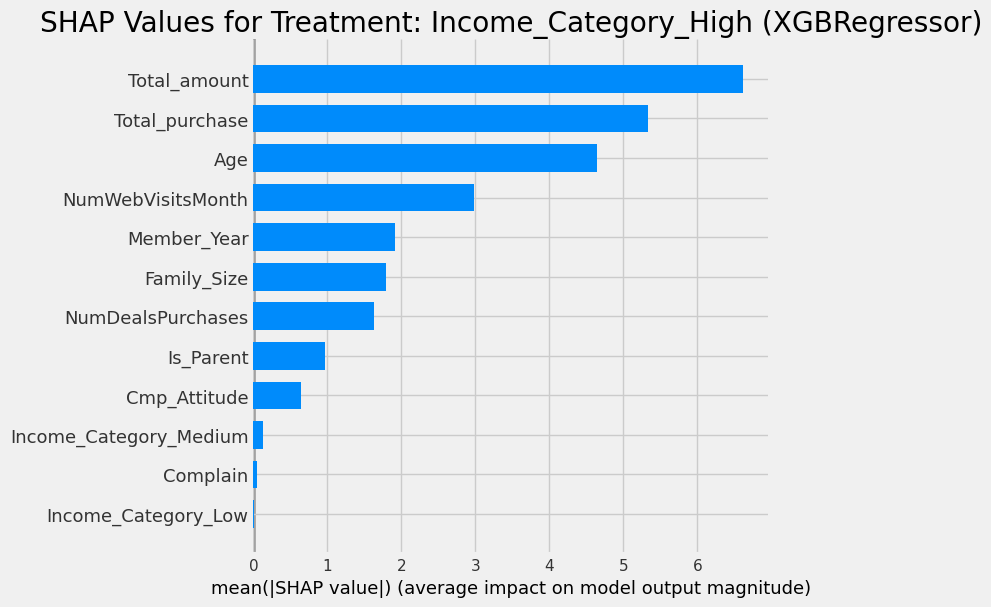

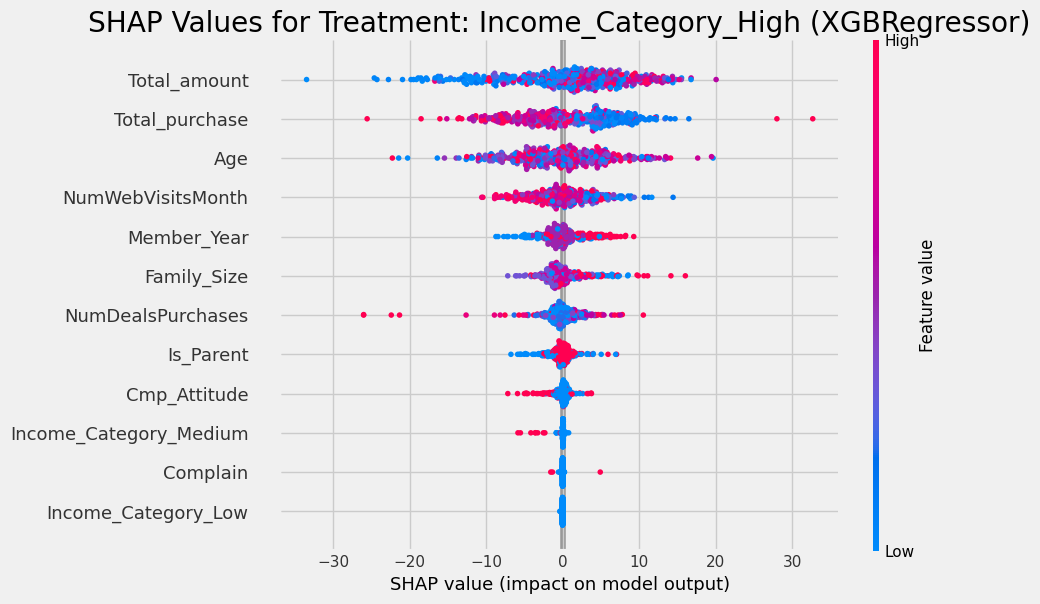

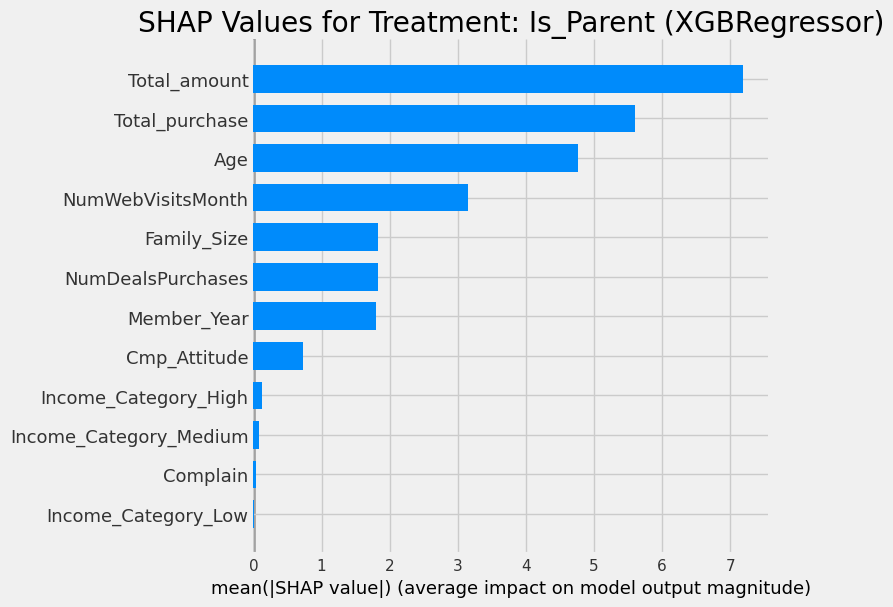

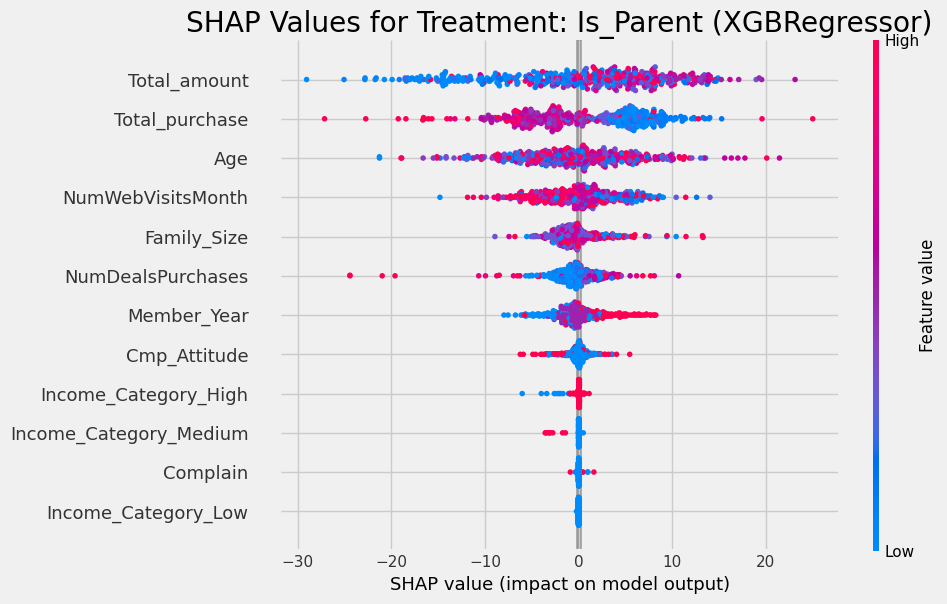

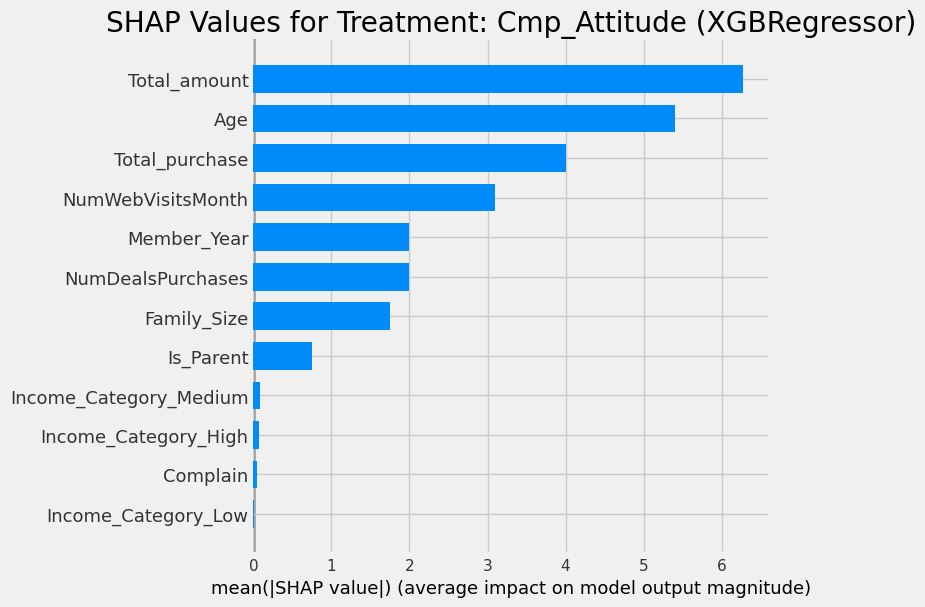

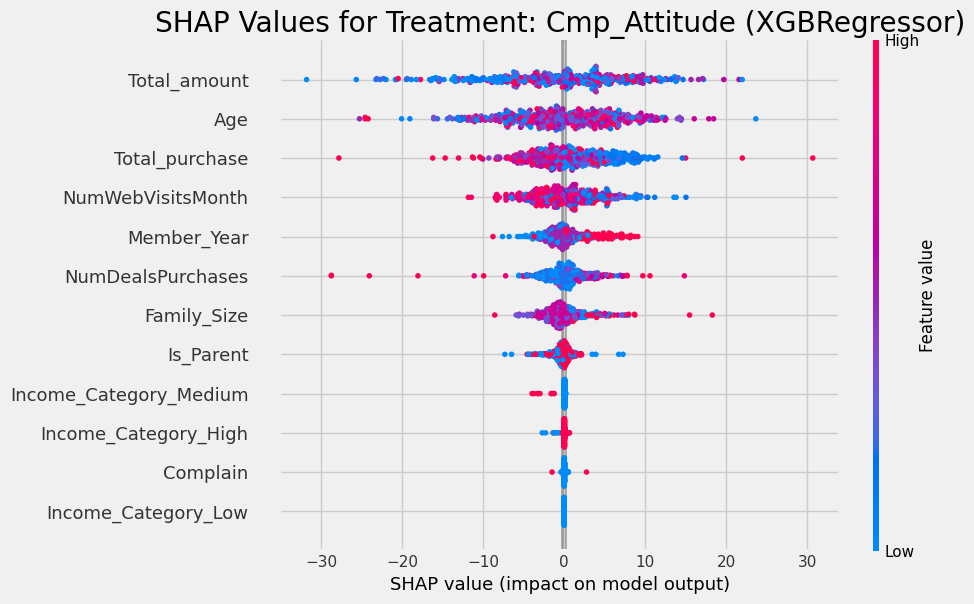

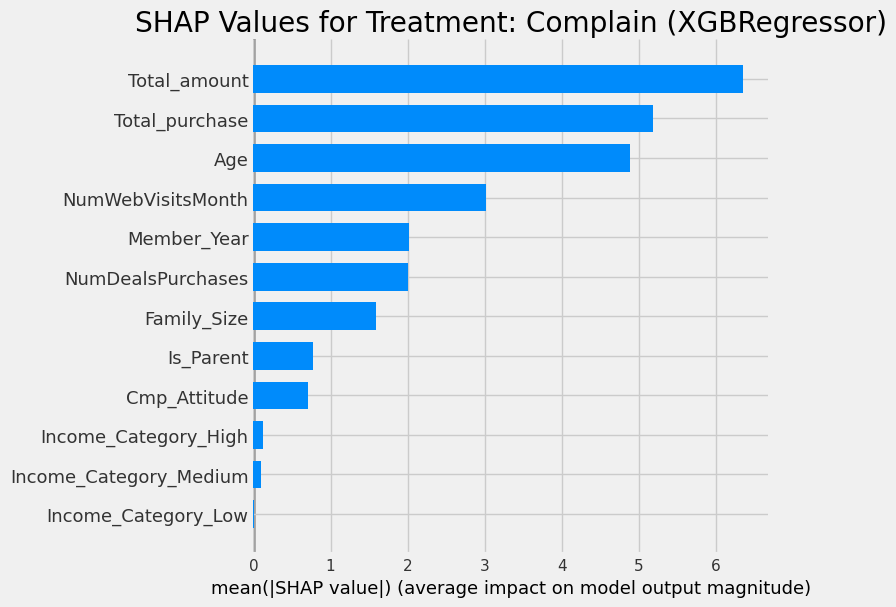

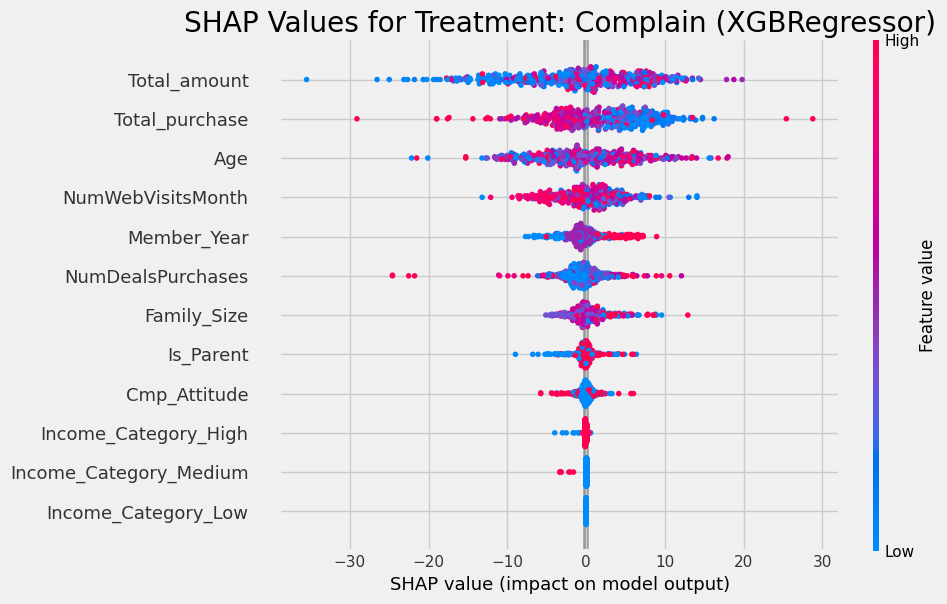


Best Model:
Model Type: XGBRegressor
Treatment: Income_Category_High
ATE: 0.9843331575393677 (±2.768747326060291)
RMSE: 54.66826952248225


In [24]:
# Define treatments, covariates, and outcome
treatments = ['Income_Category_High', 'Is_Parent', 'Cmp_Attitude', 'Complain']
covariates_list = [
    'Income_Category_High', 'Income_Category_Low', 'Income_Category_Medium',
    'Complain', 'Is_Parent', 'Cmp_Attitude', 'Family_Size', 'Age',
    'Member_Year', 'Total_amount', 'Total_purchase',
    'NumWebVisitsMonth', 'NumDealsPurchases'
]
outcome = 'Recency'

# Define the function to calculate ATE
def cross_validate_ate(estimator, X, treatment, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    ate_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        treatment_train, treatment_test = treatment.iloc[train_index], treatment.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        estimator.fit(X_train, treatment_train, y_train)
        ate_estimate = np.mean(estimator.predict(X_test))
        ate_scores.append(ate_estimate)

    return np.mean(ate_scores), np.std(ate_scores)

# Define variables to store the lowest RMSE and its corresponding values
lowest_rmse = float('inf')
best_model = None
best_treatment = None
best_model_type = None
best_ate = None
best_rmse = None

# Define dictionaries to store SHAP values for each model and treatment
shap_values_dict = {}

# Iterate over model types
for model_type in [XGBRegressor, XGBTRegressor]:
    # Iterate over treatments
    for treatment in treatments:
        current_covariates = [cov for cov in covariates_list if cov != treatment]
        X = df[current_covariates]
        y = df[outcome]
        t = df[treatment]
        
        # Split data into training and testing sets
        X_train, X_test, y_train, y_test, t_train, t_test = train_test_split(
            X, y, t, test_size=0.2, random_state=42)
        
        # Model
        if model_type == XGBRegressor:
            model = model_type()
            model.fit(X_train, y_train)
            xgb_model = XGBRegressor()
            xgb_model.fit(X_train, y_train)
            explainer = shap.Explainer(xgb_model)
            shap_values = explainer(X_test)
            shap_values_dict[(model_type, treatment)] = shap_values
        else:
            model = model_type()
            model.fit(X_train, t_train, y_train)
        
        # Estimate ATE
        ate_mean, ate_std = cross_validate_ate(model, X, t, y)
        
        # Predictions for MSE calculation
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        print(f'Model: {model_type.__name__}, Treatment: {treatment}')
        print(f'MSE: {rmse}')
        print(f'ATE: {ate_mean} (±{ate_std})')

        # Check if the current model has lower RMSE than the lowest recorded
        if rmse < lowest_rmse:
            lowest_rmse = rmse
            best_model = model
            best_treatment = treatment
            best_model_type = model_type
            best_ate = ate_mean
            best_rmse = rmse
            best_shap_values = shap_values

# Plot SHAP values for the best model and all treatments
for (model_type, treatment), shap_values in shap_values_dict.items():
    plt.title(f'SHAP Values for Treatment: {treatment} ({model_type.__name__})')
    shap.summary_plot(shap_values, X_test, plot_type="bar")
    plt.show()
    
    plt.title(f'SHAP Values for Treatment: {treatment} ({model_type.__name__})')
    shap.plots.beeswarm(shap_values, max_display=30)
    plt.show()

# Print the best model information after printing all the values and SHAP plots
print("\nBest Model:")
print(f"Model Type: {best_model_type.__name__}")
print(f"Treatment: {best_treatment}")
print(f"ATE: {best_ate} (±{ate_std})")
print(f"RMSE: {best_rmse}")

# Causal 2: Frequency Impact

[22:31:58] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
Pass `sample_weight` as keyword args.


Model: XGBRegressor, Treatment: Income_Category_High
MSE: 13.986250511430633
ATE: 0.9843336939811707 (±0.007618727162480354)


[22:31:58] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[22:31:59] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
Pass `sample_weight` as keyword args.


Model: XGBRegressor, Treatment: Is_Parent
MSE: 14.284128077269454
ATE: 0.7137254476547241 (±0.01553669199347496)


[22:32:00] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
Pass `sample_weight` as keyword args.


Model: XGBRegressor, Treatment: Cmp_Attitude
MSE: 14.588297112611109
ATE: 0.22244656085968018 (±0.00905103050172329)


[22:32:01] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
Pass `sample_weight` as keyword args.


Model: XGBRegressor, Treatment: Complain
MSE: 14.830374648143708
ATE: 0.011688657104969025 (±0.002289429772645235)
Model: XGBTRegressor, Treatment: Income_Category_High
MSE: 15.39061975888935
ATE: -0.9373861626392586 (±1.5394426797063492)
Model: XGBTRegressor, Treatment: Is_Parent
MSE: 15.170690943832787
ATE: 0.3964599999031672 (±0.1536207906982757)
Model: XGBTRegressor, Treatment: Cmp_Attitude
MSE: 15.164900929071653
ATE: -0.1534468359961125 (±0.09748981705503681)
Model: XGBTRegressor, Treatment: Complain
MSE: 17.234608005911458
ATE: 0.04491844988119449 (±0.8629775899622322)


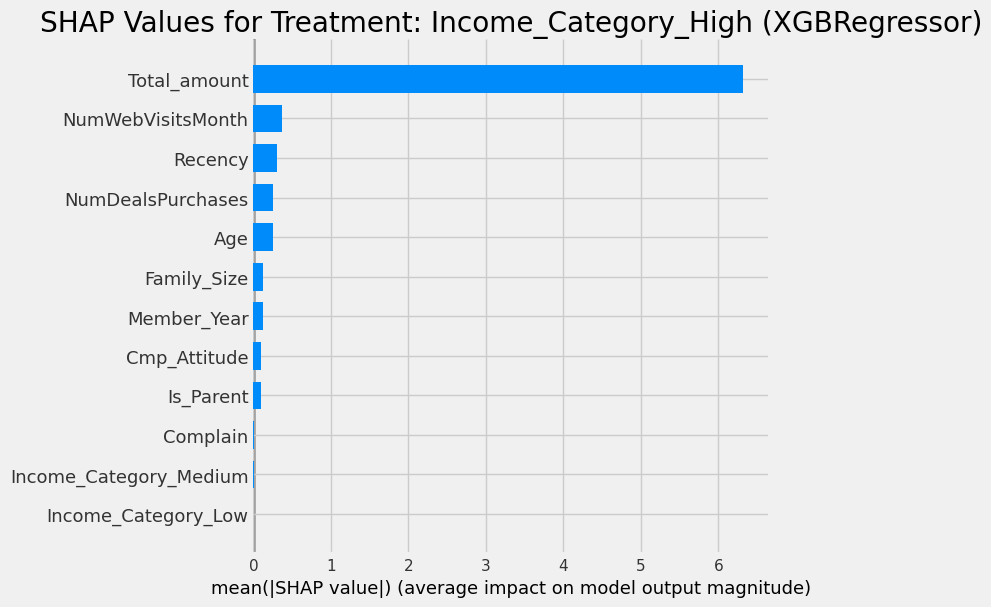

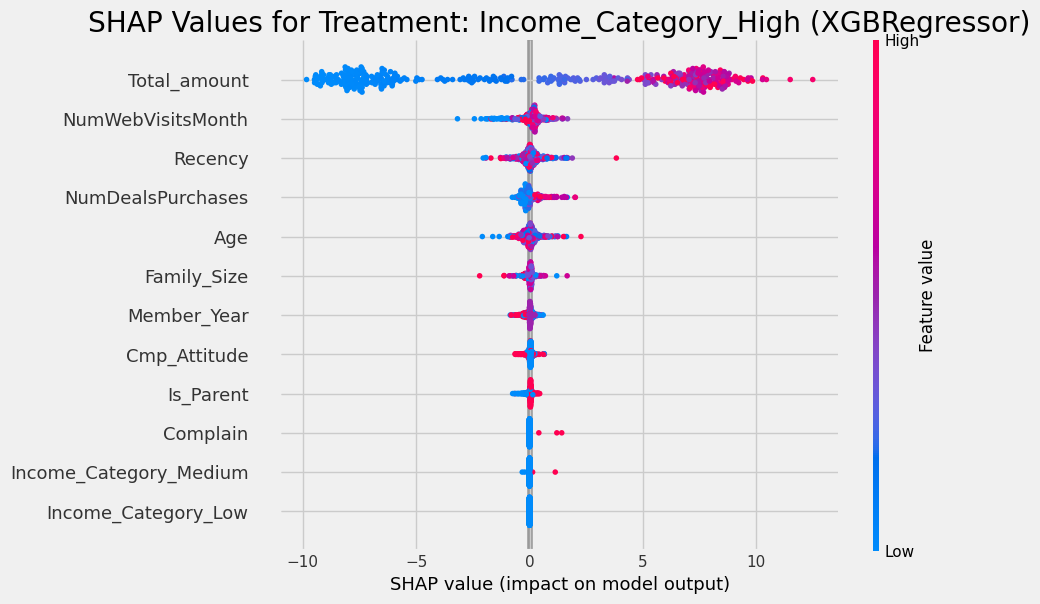

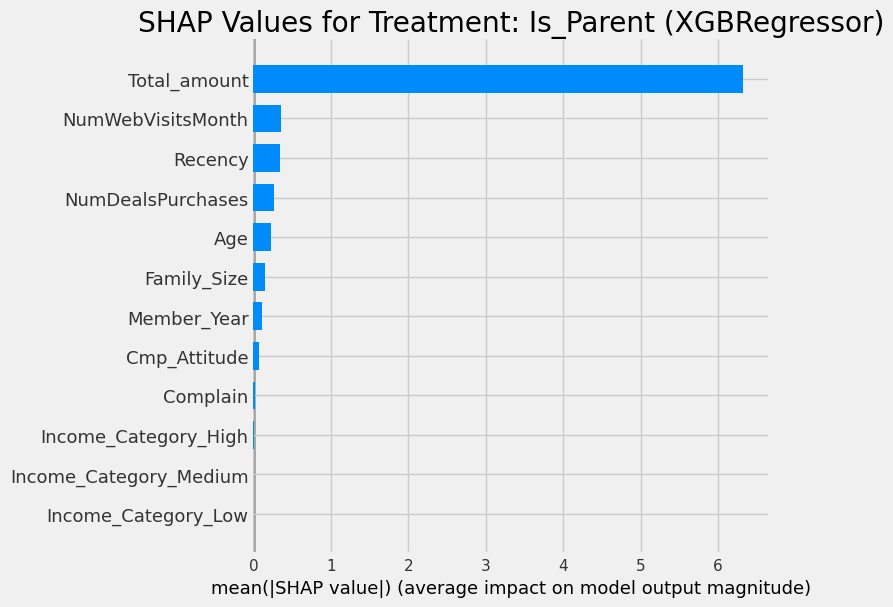

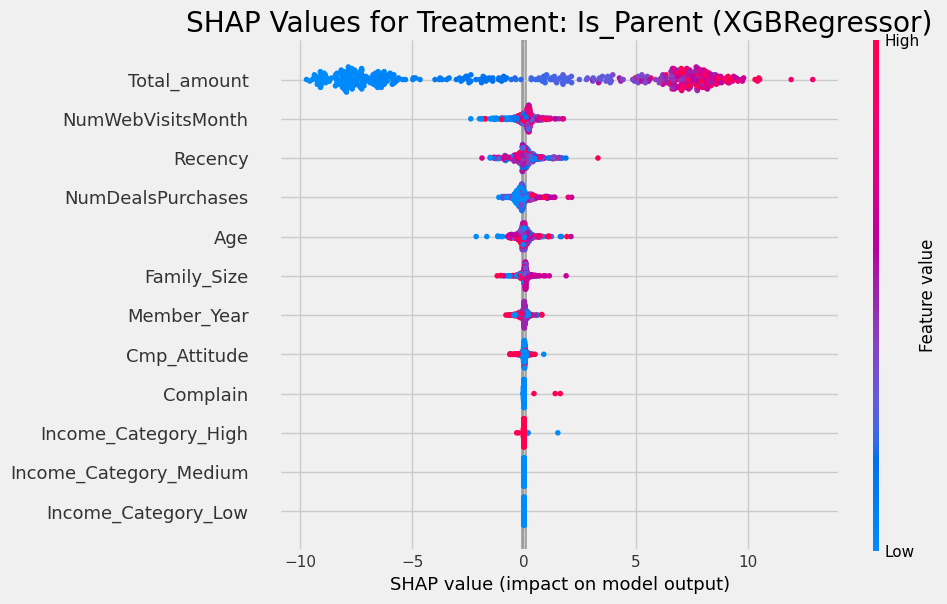

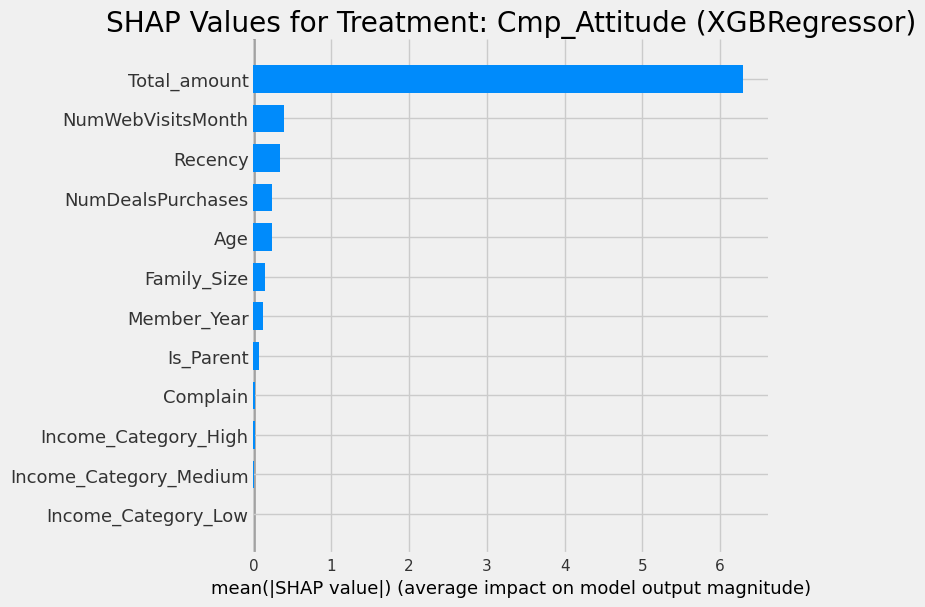

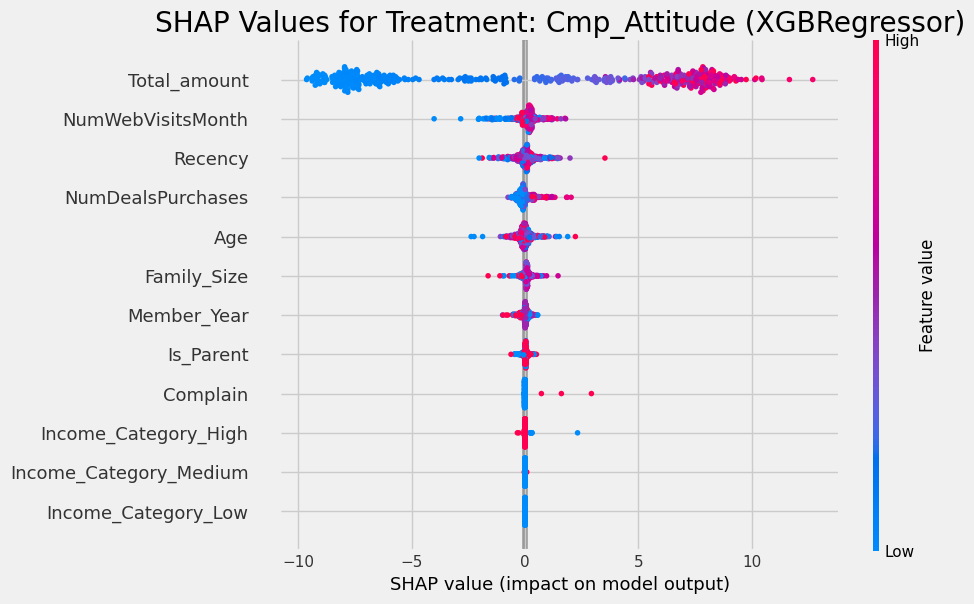

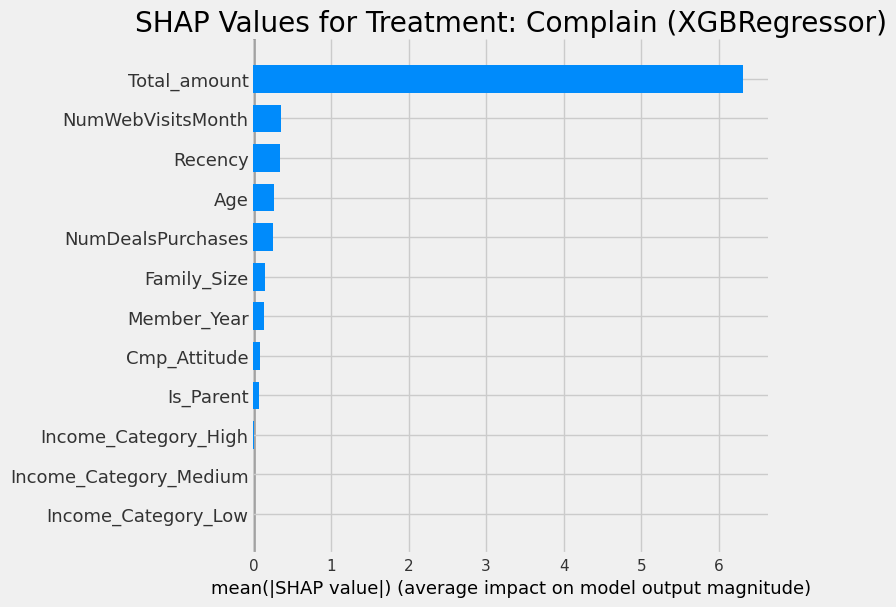

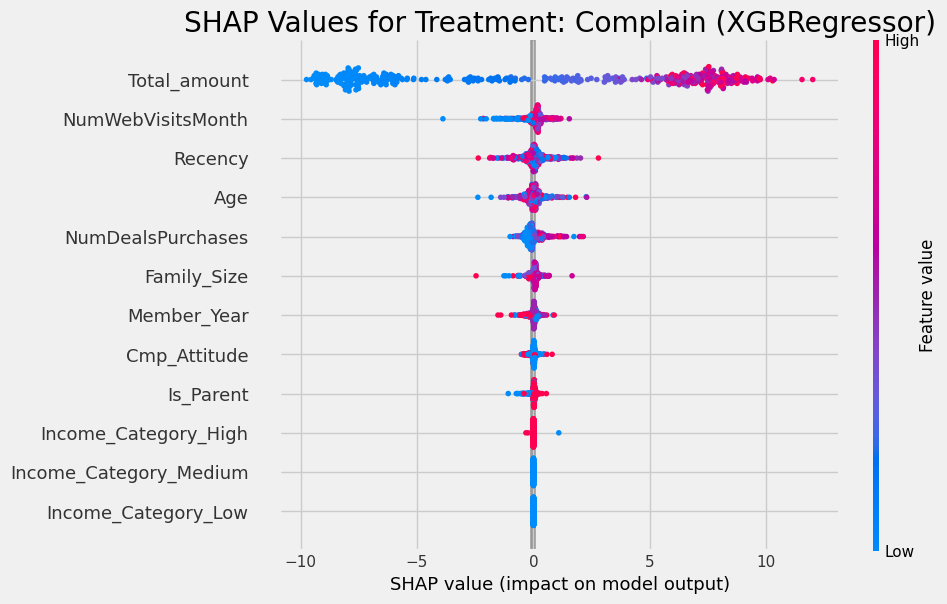


Best Model:
Model Type: XGBRegressor
Treatment: Income_Category_High
ATE: 0.9843336939811707 (±0.8629775899622322)
RMSE: 13.986250511430633


In [25]:
# Define treatments, covariates, and outcome
treatments = ['Income_Category_High', 'Is_Parent', 'Cmp_Attitude', 'Complain']
covariates_list = [
    'Income_Category_High', 'Income_Category_Low', 'Income_Category_Medium',
    'Complain', 'Is_Parent', 'Cmp_Attitude', 'Family_Size', 'Age',
    'Member_Year', 'Total_amount', 'Recency',
    'NumWebVisitsMonth', 'NumDealsPurchases'
]
outcome = 'Total_purchase'

# Define the function to calculate ATE
def cross_validate_ate(estimator, X, treatment, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    ate_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        treatment_train, treatment_test = treatment.iloc[train_index], treatment.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        estimator.fit(X_train, treatment_train, y_train)
        ate_estimate = np.mean(estimator.predict(X_test))
        ate_scores.append(ate_estimate)

    return np.mean(ate_scores), np.std(ate_scores)

# Define variables to store the lowest RMSE and its corresponding values
lowest_rmse = float('inf')
best_model = None
best_treatment = None
best_model_type = None
best_ate = None
best_rmse = None

# Define dictionaries to store SHAP values for each model and treatment
shap_values_dict = {}

# Iterate over model types
for model_type in [XGBRegressor, XGBTRegressor]:
    # Iterate over treatments
    for treatment in treatments:
        current_covariates = [cov for cov in covariates_list if cov != treatment]
        X = df[current_covariates]
        y = df[outcome]
        t = df[treatment]
        
        # Split data into training and testing sets
        X_train, X_test, y_train, y_test, t_train, t_test = train_test_split(
            X, y, t, test_size=0.2, random_state=42)
        
        # Model
        if model_type == XGBRegressor:
            model = model_type()
            model.fit(X_train, y_train)
            xgb_model = XGBRegressor()
            xgb_model.fit(X_train, y_train)
            explainer = shap.Explainer(xgb_model)
            shap_values = explainer(X_test)
            shap_values_dict[(model_type, treatment)] = shap_values
        else:
            model = model_type()
            model.fit(X_train, t_train, y_train)
        
        # Estimate ATE
        ate_mean, ate_std = cross_validate_ate(model, X, t, y)
        
        # Predictions for MSE calculation
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        print(f'Model: {model_type.__name__}, Treatment: {treatment}')
        print(f'MSE: {rmse}')
        print(f'ATE: {ate_mean} (±{ate_std})')

        # Check if the current model has lower RMSE than the lowest recorded
        if rmse < lowest_rmse:
            lowest_rmse = rmse
            best_model = model
            best_treatment = treatment
            best_model_type = model_type
            best_ate = ate_mean
            best_rmse = rmse
            best_shap_values = shap_values

# Plot SHAP values for the best model and all treatments
for (model_type, treatment), shap_values in shap_values_dict.items():
    plt.title(f'SHAP Values for Treatment: {treatment} ({model_type.__name__})')
    shap.summary_plot(shap_values, X_test, plot_type="bar")
    plt.show()
    
    plt.title(f'SHAP Values for Treatment: {treatment} ({model_type.__name__})')
    shap.plots.beeswarm(shap_values, max_display=30)
    plt.show()

# Print the best model information after printing all the values and SHAP plots
print("\nBest Model:")
print(f"Model Type: {best_model_type.__name__}")
print(f"Treatment: {best_treatment}")
print(f"ATE: {best_ate} (±{ate_std})")
print(f"RMSE: {best_rmse}")

## Ignore Total Amount

[22:32:56] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
Pass `sample_weight` as keyword args.


Model: XGBRegressor, Treatment: Income_Category_High
MSE: 13.986250511430633
ATE: 0.9843336939811707 (±0.007618727162480354)


[22:32:57] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
Pass `sample_weight` as keyword args.


Model: XGBRegressor, Treatment: Is_Parent
MSE: 14.285645064906602
ATE: 0.7149412035942078 (±0.018427331000566483)


[22:32:58] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
Pass `sample_weight` as keyword args.


Model: XGBRegressor, Treatment: Cmp_Attitude
MSE: 14.59181280050771
ATE: 0.2226729840040207 (±0.011484812013804913)


[22:32:59] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
Pass `sample_weight` as keyword args.


Model: XGBRegressor, Treatment: Complain
MSE: 14.830237005447223
ATE: 0.010928553529083729 (±0.0040216874331235886)
Model: XGBTRegressor, Treatment: Income_Category_High
MSE: 15.424613983324729
ATE: 0.5965104473327096 (±0.13913862253128276)
Model: XGBTRegressor, Treatment: Is_Parent
MSE: 17.93571545952496
ATE: -2.9790153535253037 (±0.7303742316674455)
Model: XGBTRegressor, Treatment: Cmp_Attitude
MSE: 14.22016147396175
ATE: 3.5698312666747647 (±0.26170632440272446)
Model: XGBTRegressor, Treatment: Complain
MSE: 18.85770873559633
ATE: -0.32400061933298346 (±1.408308680887594)


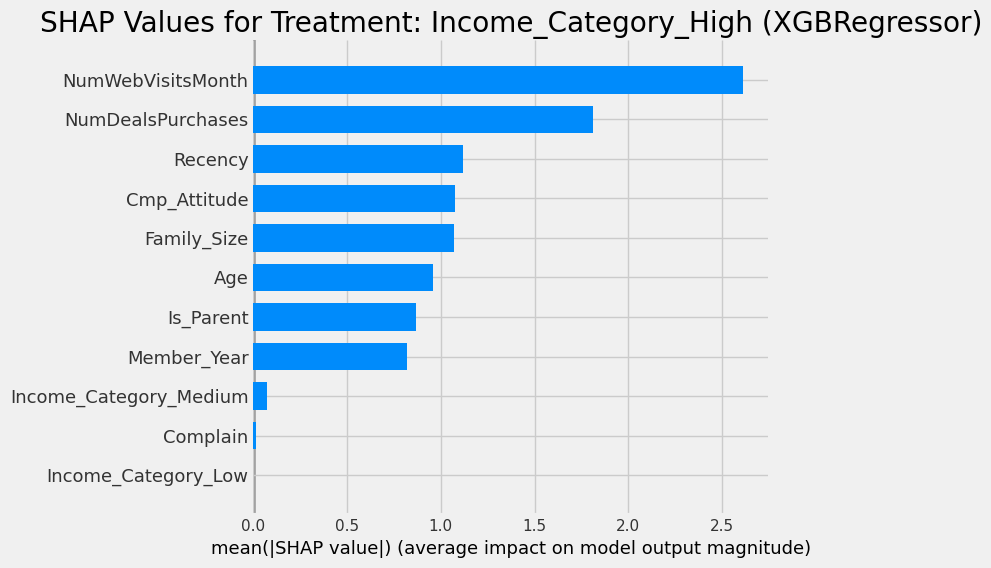

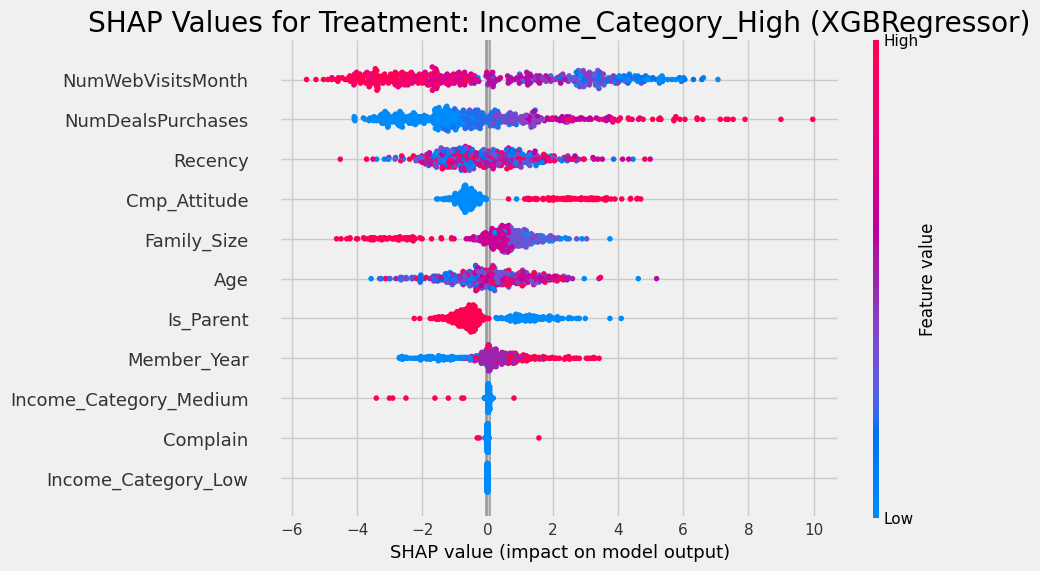

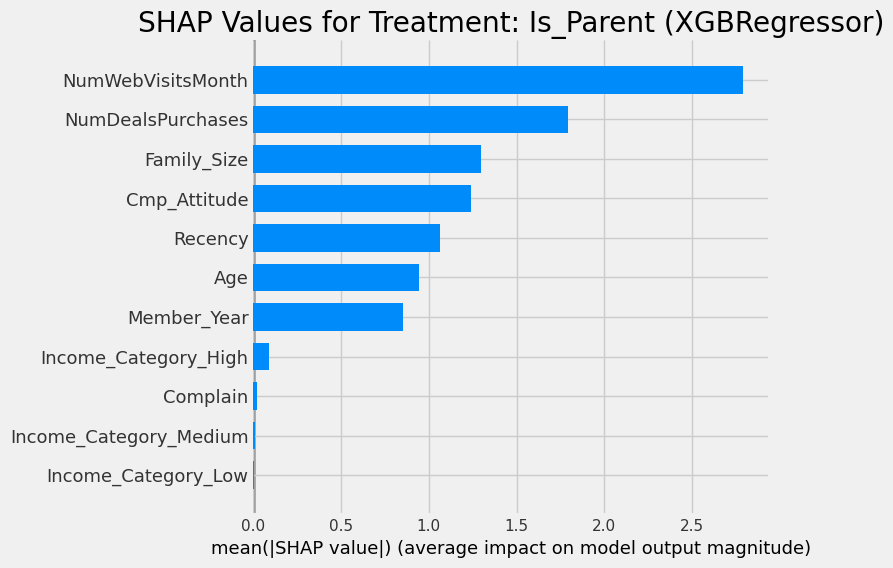

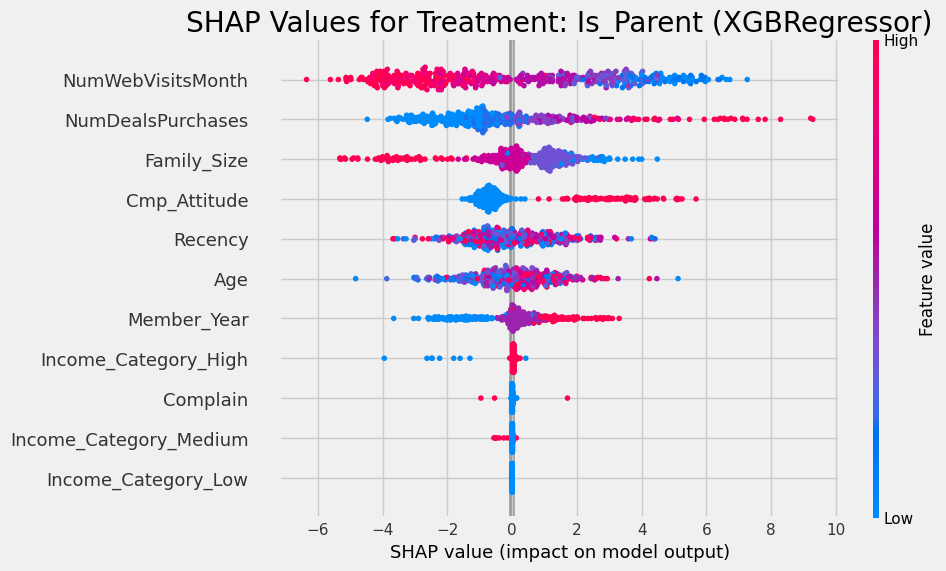

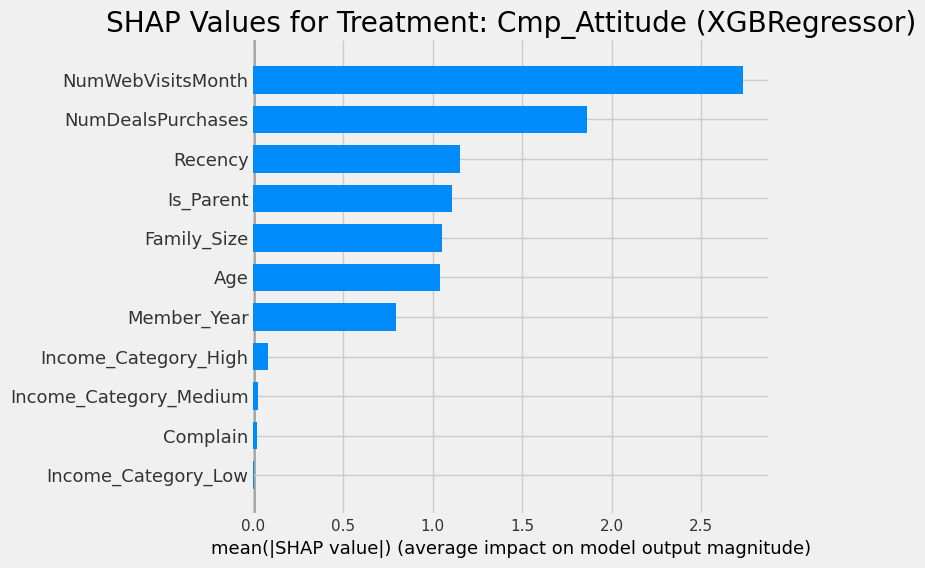

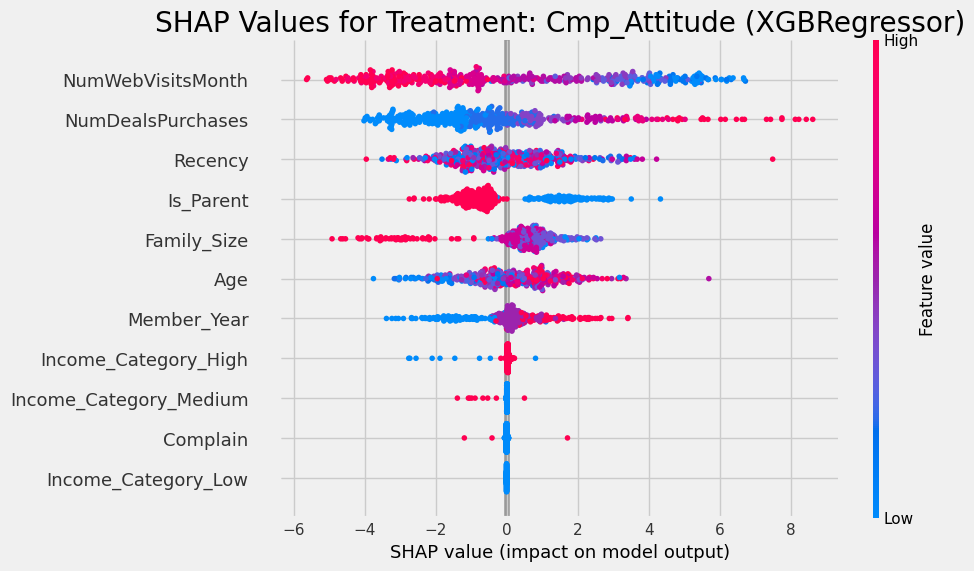

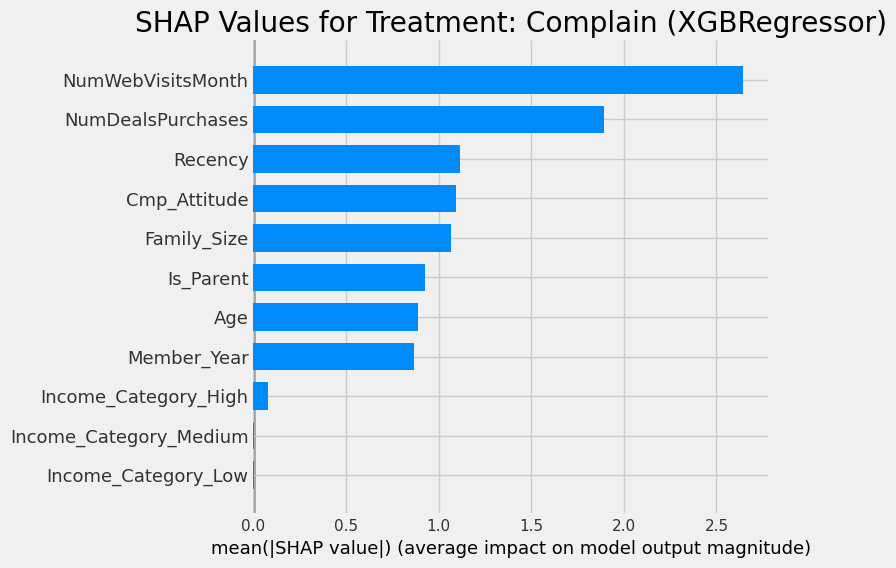

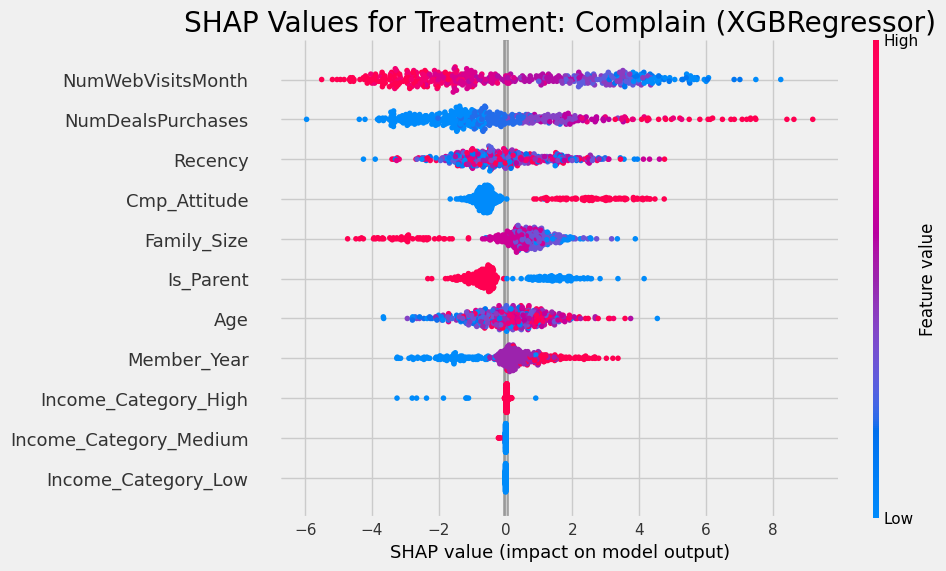


Best Model:
Model Type: XGBRegressor
Treatment: Income_Category_High
ATE: 0.9843336939811707 (±1.408308680887594)
RMSE: 13.986250511430633


In [26]:
# Define treatments, covariates, and outcome
treatments = ['Income_Category_High', 'Is_Parent', 'Cmp_Attitude', 'Complain']
covariates_list = [
    'Income_Category_High', 'Income_Category_Low', 'Income_Category_Medium',
    'Complain', 'Is_Parent', 'Cmp_Attitude', 'Family_Size', 'Age',
    'Member_Year', 'Recency',
    'NumWebVisitsMonth', 'NumDealsPurchases'
]
outcome = 'Total_purchase'

# Define the function to calculate ATE
def cross_validate_ate(estimator, X, treatment, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    ate_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        treatment_train, treatment_test = treatment.iloc[train_index], treatment.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        estimator.fit(X_train, treatment_train, y_train)
        ate_estimate = np.mean(estimator.predict(X_test))
        ate_scores.append(ate_estimate)

    return np.mean(ate_scores), np.std(ate_scores)

# Define variables to store the lowest RMSE and its corresponding values
lowest_rmse = float('inf')
best_model = None
best_treatment = None
best_model_type = None
best_ate = None
best_rmse = None

# Define dictionaries to store SHAP values for each model and treatment
shap_values_dict = {}

# Iterate over model types
for model_type in [XGBRegressor, XGBTRegressor]:
    # Iterate over treatments
    for treatment in treatments:
        current_covariates = [cov for cov in covariates_list if cov != treatment]
        X = df[current_covariates]
        y = df[outcome]
        t = df[treatment]
        
        # Split data into training and testing sets
        X_train, X_test, y_train, y_test, t_train, t_test = train_test_split(
            X, y, t, test_size=0.2, random_state=42)
        
        # Model
        if model_type == XGBRegressor:
            model = model_type()
            model.fit(X_train, y_train)
            xgb_model = XGBRegressor()
            xgb_model.fit(X_train, y_train)
            explainer = shap.Explainer(xgb_model)
            shap_values = explainer(X_test)
            shap_values_dict[(model_type, treatment)] = shap_values
        else:
            model = model_type()
            model.fit(X_train, t_train, y_train)
        
        # Estimate ATE
        ate_mean, ate_std = cross_validate_ate(model, X, t, y)
        
        # Predictions for MSE calculation
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        print(f'Model: {model_type.__name__}, Treatment: {treatment}')
        print(f'MSE: {rmse}')
        print(f'ATE: {ate_mean} (±{ate_std})')

        # Check if the current model has lower RMSE than the lowest recorded
        if rmse < lowest_rmse:
            lowest_rmse = rmse
            best_model = model
            best_treatment = treatment
            best_model_type = model_type
            best_ate = ate_mean
            best_rmse = rmse
            best_shap_values = shap_values

# Plot SHAP values for the best model and all treatments
for (model_type, treatment), shap_values in shap_values_dict.items():
    plt.title(f'SHAP Values for Treatment: {treatment} ({model_type.__name__})')
    shap.summary_plot(shap_values, X_test, plot_type="bar")
    plt.show()
    
    plt.title(f'SHAP Values for Treatment: {treatment} ({model_type.__name__})')
    shap.plots.beeswarm(shap_values, max_display=30)
    plt.show()

# Print the best model information after printing all the values and SHAP plots
print("\nBest Model:")
print(f"Model Type: {best_model_type.__name__}")
print(f"Treatment: {best_treatment}")
print(f"ATE: {best_ate} (±{ate_std})")
print(f"RMSE: {best_rmse}")

# Causal 3: Monetary Value Impact

[22:34:31] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
Pass `sample_weight` as keyword args.


Model: XGBRegressor, Treatment: Income_Category_High
MSE: 857.4756523780103
ATE: 0.9843332171440125 (±0.007619265932589769)


[22:34:32] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
Pass `sample_weight` as keyword args.


Model: XGBRegressor, Treatment: Is_Parent
MSE: 857.8202592645457
ATE: 0.7161449790000916 (±0.011918761767446995)


[22:34:34] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[22:34:35] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
Pass `sample_weight` as keyword args.


Model: XGBRegressor, Treatment: Cmp_Attitude
MSE: 857.934792972118
ATE: 0.2384856641292572 (±0.010452664457261562)


[22:34:37] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
Pass `sample_weight` as keyword args.


Model: XGBRegressor, Treatment: Complain
MSE: 858.1965451031014
ATE: 0.013003888539969921 (±0.004233632702380419)
Model: XGBTRegressor, Treatment: Income_Category_High
MSE: 248.60286616995214
ATE: 345.9304173854554 (±57.255214120351106)
Model: XGBTRegressor, Treatment: Is_Parent
MSE: 1265.3433627737957
ATE: -333.45447095389466 (±57.29262500800163)
Model: XGBTRegressor, Treatment: Cmp_Attitude
MSE: 828.4905979533905
ATE: 390.24940684544396 (±18.19156675807574)
Model: XGBTRegressor, Treatment: Complain
MSE: 1262.2198994082862
ATE: -99.14008480860448 (±106.38140581594362)


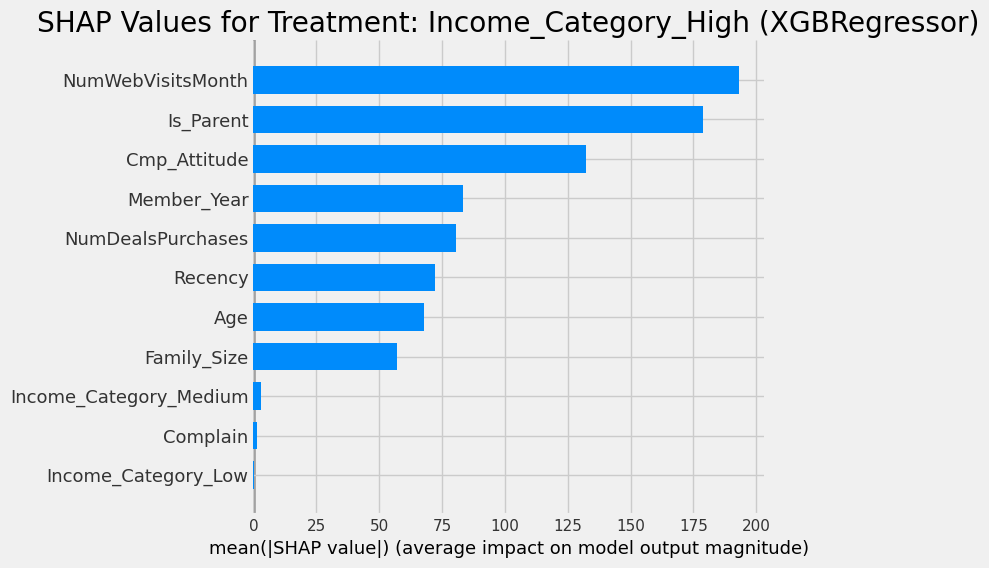

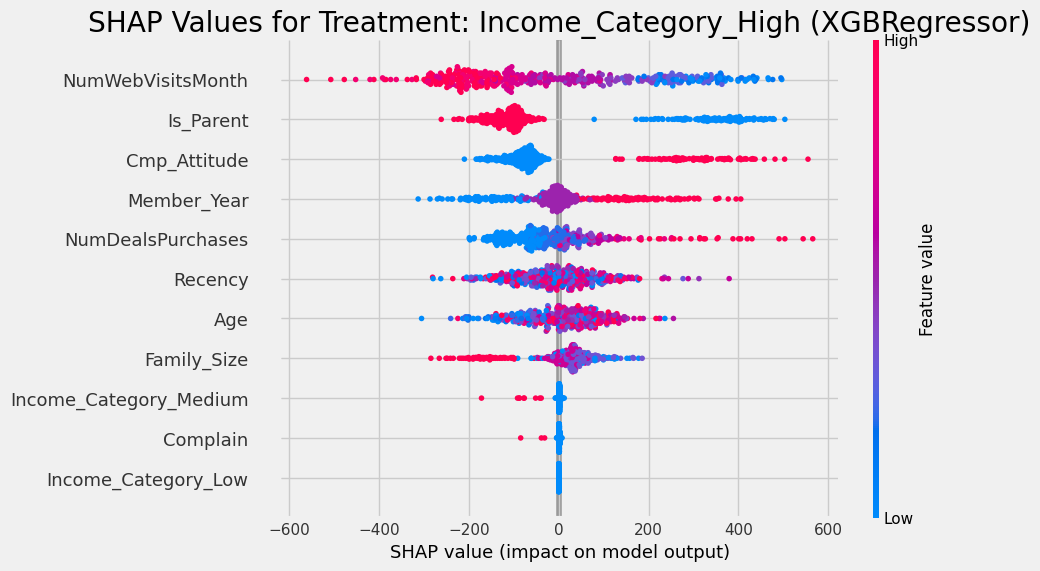

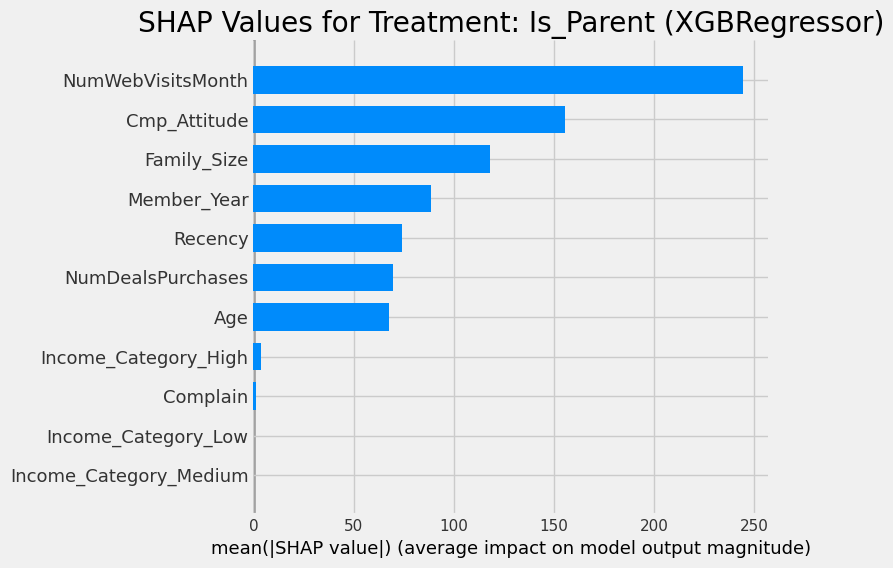

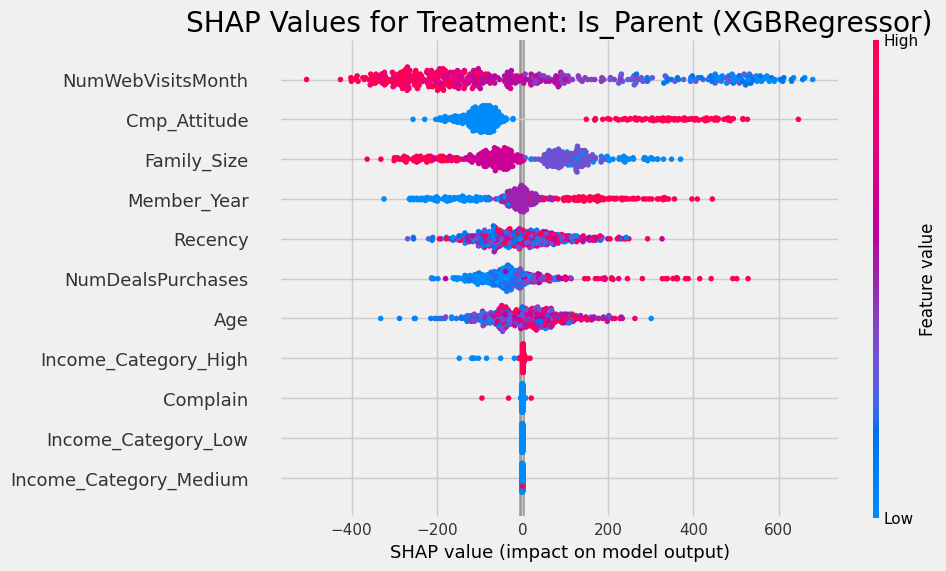

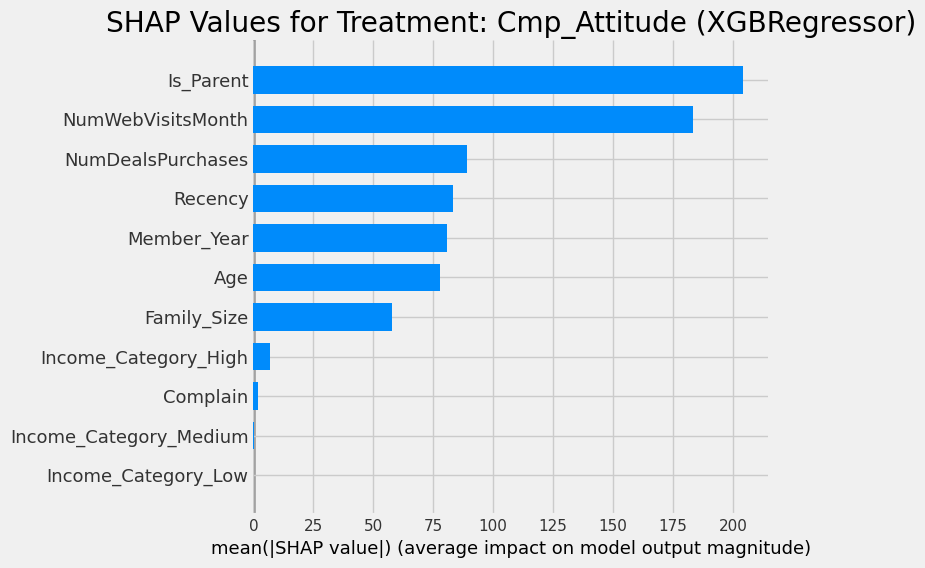

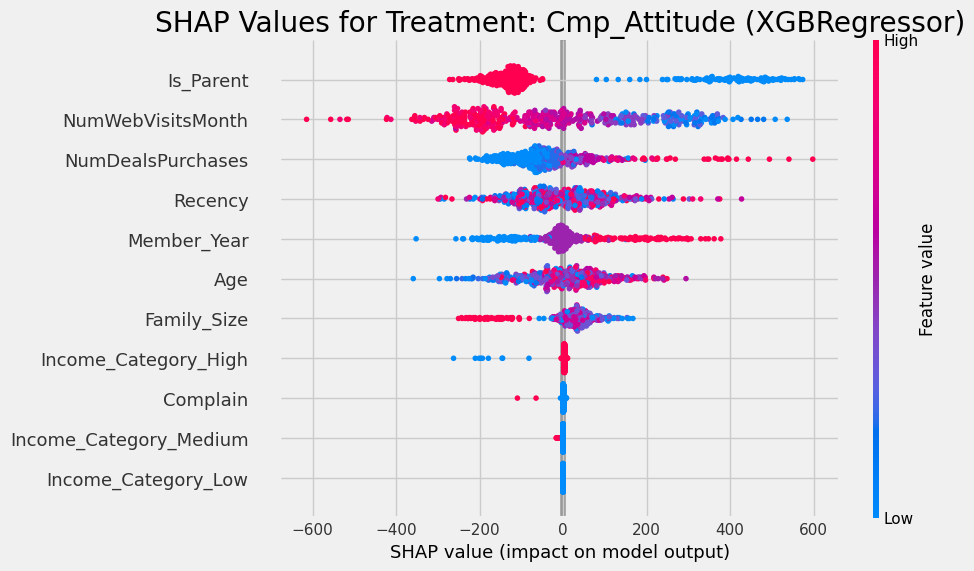

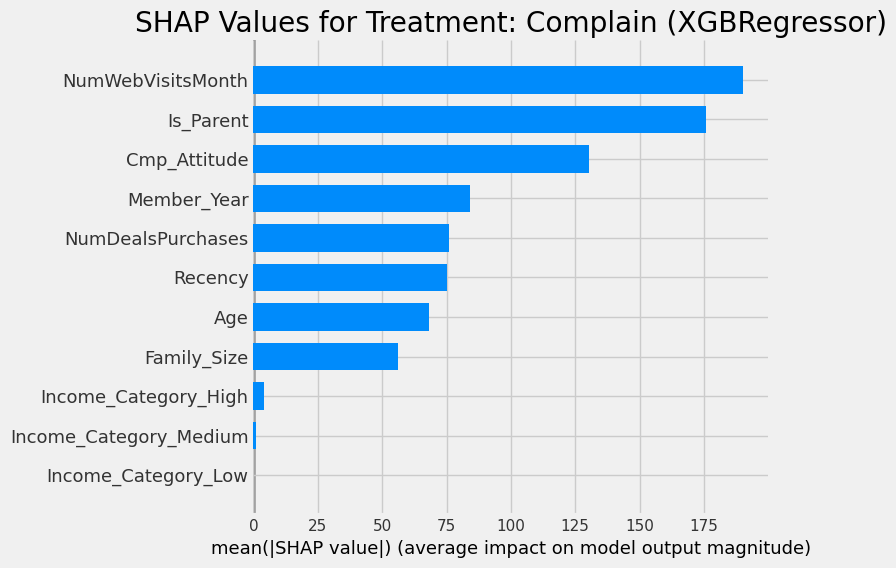

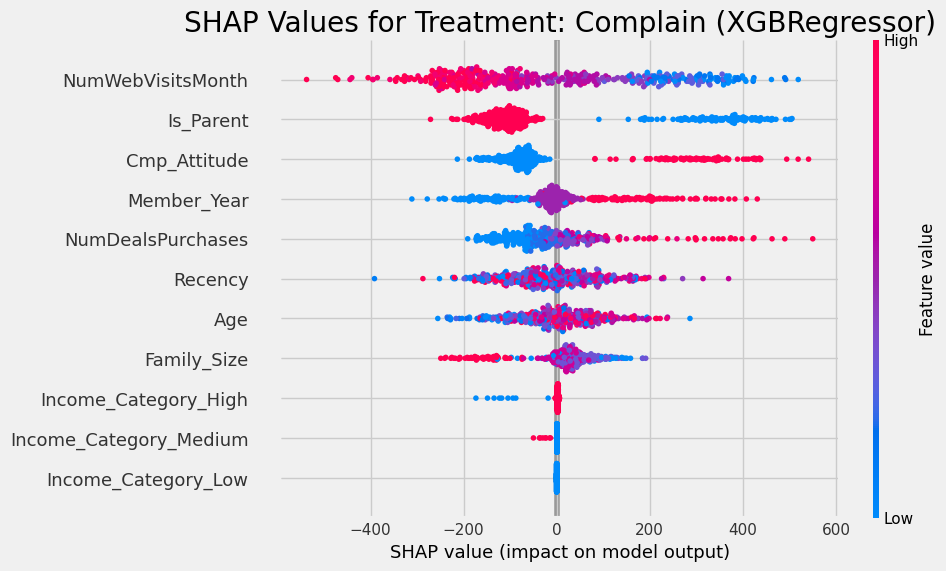


Best Model:
Model Type: XGBTRegressor
Treatment: Income_Category_High
ATE: 345.9304173854554 (±106.38140581594362)
RMSE: 248.60286616995214


In [27]:
# Define treatments, covariates, and outcome
treatments = ['Income_Category_High', 'Is_Parent', 'Cmp_Attitude', 'Complain']
covariates_list = [
    'Income_Category_High', 'Income_Category_Low', 'Income_Category_Medium',
    'Complain', 'Is_Parent', 'Cmp_Attitude', 'Family_Size', 'Age',
    'Member_Year', 'Recency',
    'NumWebVisitsMonth', 'NumDealsPurchases'
]
outcome = 'Total_amount'

# Define the function to calculate ATE
def cross_validate_ate(estimator, X, treatment, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    ate_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        treatment_train, treatment_test = treatment.iloc[train_index], treatment.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        estimator.fit(X_train, treatment_train, y_train)
        ate_estimate = np.mean(estimator.predict(X_test))
        ate_scores.append(ate_estimate)

    return np.mean(ate_scores), np.std(ate_scores)

# Define variables to store the lowest RMSE and its corresponding values
lowest_rmse = float('inf')
best_model = None
best_treatment = None
best_model_type = None
best_ate = None
best_rmse = None

# Define dictionaries to store SHAP values for each model and treatment
shap_values_dict = {}

# Iterate over model types
for model_type in [XGBRegressor, XGBTRegressor]:
    # Iterate over treatments
    for treatment in treatments:
        current_covariates = [cov for cov in covariates_list if cov != treatment]
        X = df[current_covariates]
        y = df[outcome]
        t = df[treatment]
        
        # Split data into training and testing sets
        X_train, X_test, y_train, y_test, t_train, t_test = train_test_split(
            X, y, t, test_size=0.2, random_state=42)
        
        # Model
        if model_type == XGBRegressor:
            model = model_type()
            model.fit(X_train, y_train)
            xgb_model = XGBRegressor()
            xgb_model.fit(X_train, y_train)
            explainer = shap.Explainer(xgb_model)
            shap_values = explainer(X_test)
            shap_values_dict[(model_type, treatment)] = shap_values
        else:
            model = model_type()
            model.fit(X_train, t_train, y_train)
        
        # Estimate ATE
        ate_mean, ate_std = cross_validate_ate(model, X, t, y)
        
        # Predictions for MSE calculation
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        print(f'Model: {model_type.__name__}, Treatment: {treatment}')
        print(f'MSE: {rmse}')
        print(f'ATE: {ate_mean} (±{ate_std})')

        # Check if the current model has lower RMSE than the lowest recorded
        if rmse < lowest_rmse:
            lowest_rmse = rmse
            best_model = model
            best_treatment = treatment
            best_model_type = model_type
            best_ate = ate_mean
            best_rmse = rmse
            best_shap_values = shap_values

# Plot SHAP values for the best model and all treatments
for (model_type, treatment), shap_values in shap_values_dict.items():
    plt.title(f'SHAP Values for Treatment: {treatment} ({model_type.__name__})')
    shap.summary_plot(shap_values, X_test, plot_type="bar")
    plt.show()
    
    plt.title(f'SHAP Values for Treatment: {treatment} ({model_type.__name__})')
    shap.plots.beeswarm(shap_values, max_display=30)
    plt.show()

# Print the best model information after printing all the values and SHAP plots
print("\nBest Model:")
print(f"Model Type: {best_model_type.__name__}")
print(f"Treatment: {best_treatment}")
print(f"ATE: {best_ate} (±{ate_std})")
print(f"RMSE: {best_rmse}")